In [5]:
import pandas as pd

import numpy as np

In [6]:
csv_up = pd.read_csv('User_Work_Processed_data _7_17.csv')

df_up = pd.DataFrame(csv_up) 

#df_up = df_up[~df_up['Action Taken By'].str.contains('mas')]

df_up['Action Taken By'] = df_up['Action Taken By'].str.replace('.', ' ')

df_up['Action Taken By'].tolist()


['william jesperson',
 'ruth howe',
 'carrie mlinarcik',
 'donna garcia1',
 'keshia stansbury',
 'teresa zepeda',
 'tracy brown1',
 'brenda rahman',
 'donna garcia1',
 'keshia stansbury',
 'monica rico',
 'ruth howe',
 'carrie mlinarcik',
 'ruth howe',
 'becky lindstrom',
 'carrie mlinarcik',
 'mas27',
 'mas29',
 'brenda rahman',
 'carrie mlinarcik',
 'donna garcia1',
 'mas06',
 'mas29',
 'ruth howe',
 'shaun chelgreen1',
 'keshia stansbury',
 'mailauto1',
 'mas09',
 'mas29',
 'monica rico',
 'rachel weaver',
 'shirley farabaugh',
 'teresa zepeda',
 'keshia stansbury',
 'mas06',
 'mas09',
 'mas27',
 'tracy brown1',
 'quinetta martin-jordan',
 'becky lindstrom',
 'brenda rahman',
 'lee dahnert']

In [7]:
names = df_up['Action Taken By'].tolist()


In [8]:
df_up['User Role'].value_counts()


df_up = df_up.sort_values(by='User Role')

df_up = df_up[df_up['Action Taken']=='Reassign']

df_up = df_up[df_up['User Role']!='CM Analyst (All Queues)']

In [9]:
df_up_grouped = df_up.groupby(['User Role', 'Action Taken By'])['Number Of Actions'].sum().reset_index()
df_up_grouped

,User Role,Action Taken By,Number Of Actions
0,Basic User,brenda rahman,20
1,Basic User,carrie mlinarcik,70
2,Basic User,donna garcia1,16
3,Basic User,keshia stansbury,57
4,Basic User,monica rico,46
5,Basic User,ruth howe,64
6,Basic User,shirley farabaugh,10
7,Basic User,teresa zepeda,1
8,Basic User,tracy brown1,17
9,COR User Role,becky lindstrom,77


In [10]:
def make_colors(x):
    if x == 'Basic User':
        return '#0A0358'
    if x =='COR User Role':
        return'#8700FF'
    else: 
        return '#D9F209'
    

In [11]:
color_array = df_up_grouped['User Role'].apply(make_colors).values

In [12]:
color_array

array(['#0A0358', '#0A0358', '#0A0358', '#0A0358', '#0A0358', '#0A0358',
       '#0A0358', '#0A0358', '#0A0358', '#8700FF', '#D9F209', '#D9F209'],
      dtype=object)

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

#df_up_grouped.plot(figsize=[13,13], kind='bar', width=.5, colormap=color_array)

x=np.arange(len(df_up_grouped))

plt.figure(figsize=[15,10])

plt.title('# of reassign actions 6.15', fontsize=20)

plt.ylabel('# of reassigns', fontsize=15)

plt.bar(x, df_up_grouped['Number Of Actions'], color= color_array)

plt.xticks(x,df_up_grouped['Action Taken By'], rotation='vertical', fontsize=20)

plt.style.use('ggplot')

blue_patch = mpatches.Patch(color='#0A0358', label='DQ Contractors')

purp_patch= mpatches.Patch(color='#8700FF', label='COR User')

yell_patch=mpatches.Patch(color='#D9F209', label='Super User')

plt.legend(handles=[blue_patch, purp_patch,yell_patch])

plt.savefig('# of reassign actions 6.15.png', bbox_inches ='tight')


No handles with labels found to put in legend.


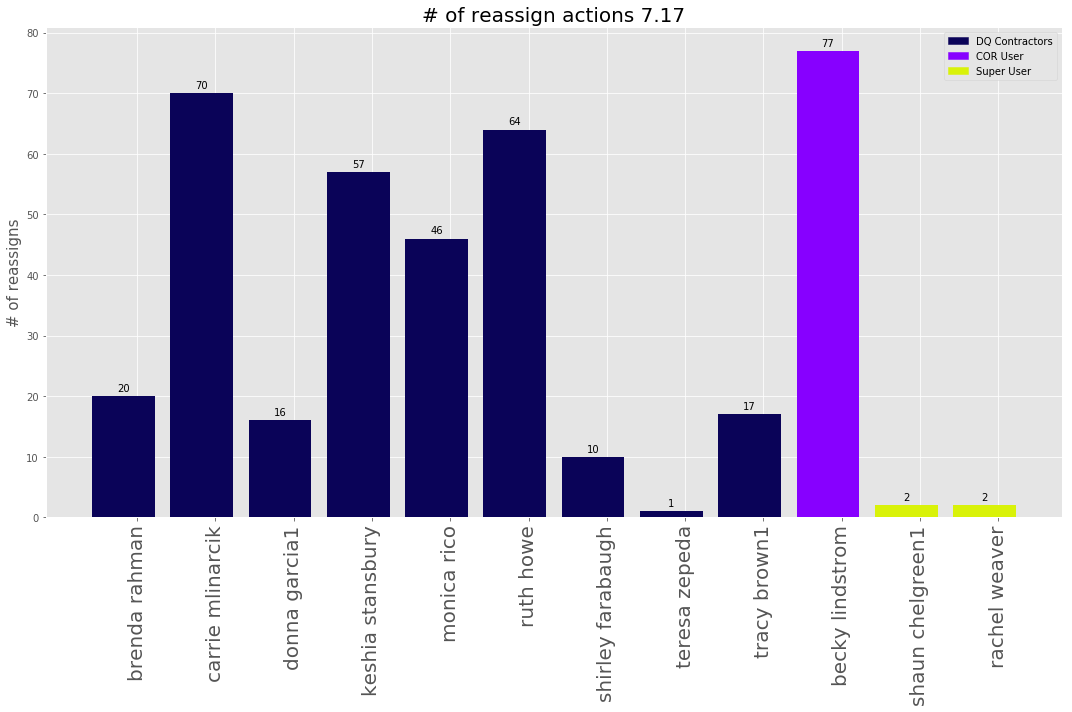

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


x=np.arange(len(df_up_grouped))
 # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, df_up_grouped['Number Of Actions'], color=color_array)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('# of reassigns', fontsize=15)
plt.title('# of reassign actions 7.17', fontsize=20)

plt.xticks(x,df_up_grouped['Action Taken By'], rotation='vertical', fontsize=20)
#ax.set_xticks(x, df_up_grouped['Action Taken By'])
#ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
fig.tight_layout()

blue_patch = mpatches.Patch(color='#0A0358', label='DQ Contractors')

purp_patch= mpatches.Patch(color='#8700FF', label='COR User')

yell_patch=mpatches.Patch(color='#D9F209', label='Super User')

plt.legend(handles=[blue_patch, purp_patch,yell_patch])

plt.style.use('ggplot')

plt.savefig('# of reassign actions 7.17.png', bbox_inches ='tight')
